In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import datetime as dt

In [81]:
df = pd.read_csv('superstore_US.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [29]:
df.head(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [30]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [31]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [32]:
# Tổng doanh thu và lợi nhuận
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Tổng doanh thu: {total_sales}")
print(f"Tổng lợi nhuận: {total_profit}")

Tổng doanh thu: 2297200.8603000003
Tổng lợi nhuận: 286397.0217


In [33]:
# Doanh thu trung bình
average_sales = df['Sales'].mean()
print(f"Doanh thu trung bình: {average_sales}")

Doanh thu trung bình: 229.85800083049833


In [34]:
# Lợi nhuận trung bình
average_profit = df['Profit'].mean()
print(f"Lợi nhuận trung bình : {average_profit}")

Lợi nhuận trung bình : 28.65689630778467


In [35]:
# Chuyển đổi cột ngày tháng
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [36]:
# Doanh thu và lợi nhuận theo tháng
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
monthly_profit = df.resample('M', on='Order Date')['Profit'].sum()

print("Doanh thu theo tháng:")
print(monthly_sales)
print("Lợi nhuận theo tháng:")
print(monthly_profit)

Doanh thu theo tháng:
Order Date
2014-01-31     14236.8950
2014-02-28      4519.8920
2014-03-31     55691.0090
2014-04-30     28295.3450
2014-05-31     23648.2870
2014-06-30     34595.1276
2014-07-31     33946.3930
2014-08-31     27909.4685
2014-09-30     81777.3508
2014-10-31     31453.3930
2014-11-30     78628.7167
2014-12-31     69545.6205
2015-01-31     18174.0756
2015-02-28     11951.4110
2015-03-31     38726.2520
2015-04-30     34195.2085
2015-05-31     30131.6865
2015-06-30     24797.2920
2015-07-31     28765.3250
2015-08-31     36898.3322
2015-09-30     64595.9180
2015-10-31     31404.9235
2015-11-30     75972.5635
2015-12-31     74919.5212
2016-01-31     18542.4910
2016-02-29     22978.8150
2016-03-31     51715.8750
2016-04-30     38750.0390
2016-05-31     56987.7280
2016-06-30     40344.5340
2016-07-31     39261.9630
2016-08-31     31115.3743
2016-09-30     73410.0249
2016-10-31     59687.7450
2016-11-30     79411.9658
2016-12-31     96999.0430
2017-01-31     43971.3740
2017-

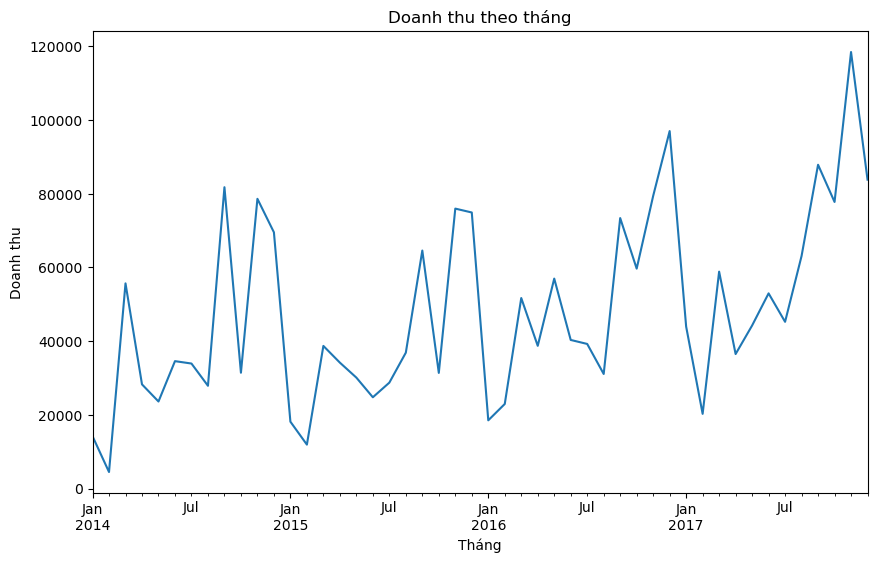

In [37]:
# Biểu đồ doanh thu theo tháng
plt.figure(figsize=(10,6))
monthly_sales.plot()
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.show()

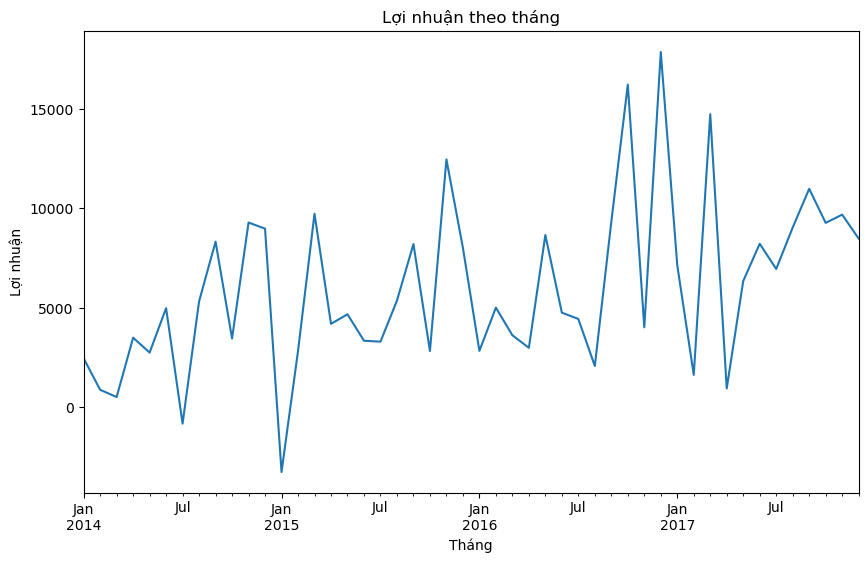

In [38]:
# Biểu đồ lợi nhuận theo tháng
plt.figure(figsize=(10,6))
monthly_profit.plot()
plt.title('Lợi nhuận theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Lợi nhuận')
plt.show()

In [39]:
# Doanh thu và lợi nhuận theo quý
quarterly_sales = df.resample('Q', on='Order Date')['Sales'].sum()
quarterly_profit = df.resample('Q', on='Order Date')['Profit'].sum()

print(f"Doanh thu theo quý : {quarterly_sales}")
print(f"Lợi nhuận theo quý : {quarterly_profit}")

Doanh thu theo quý : Order Date
2014-03-31     74447.7960
2014-06-30     86538.7596
2014-09-30    143633.2123
2014-12-31    179627.7302
2015-03-31     68851.7386
2015-06-30     89124.1870
2015-09-30    130259.5752
2015-12-31    182297.0082
2016-03-31     93237.1810
2016-06-30    136082.3010
2016-09-30    143787.3622
2016-12-31    236098.7538
2017-03-31    123144.8602
2017-06-30    133764.3720
2017-09-30    196251.9560
2017-12-31    280054.0670
Freq: Q-DEC, Name: Sales, dtype: float64
Lợi nhuận theo quý : Order Date
2014-03-31     3811.2290
2014-06-30    11204.0692
2014-09-30    12804.7218
2014-12-31    21723.9541
2015-03-31     9264.9416
2015-06-30    12190.9224
2015-09-30    16853.6194
2015-12-31    23309.1203
2016-03-31    11441.3708
2016-06-30    16390.3394
2016-09-30    15823.6048
2016-12-31    38139.8593
2017-03-31    23506.2026
2017-06-30    15499.2085
2017-09-30    26985.1325
2017-12-31    27448.7260
Freq: Q-DEC, Name: Profit, dtype: float64


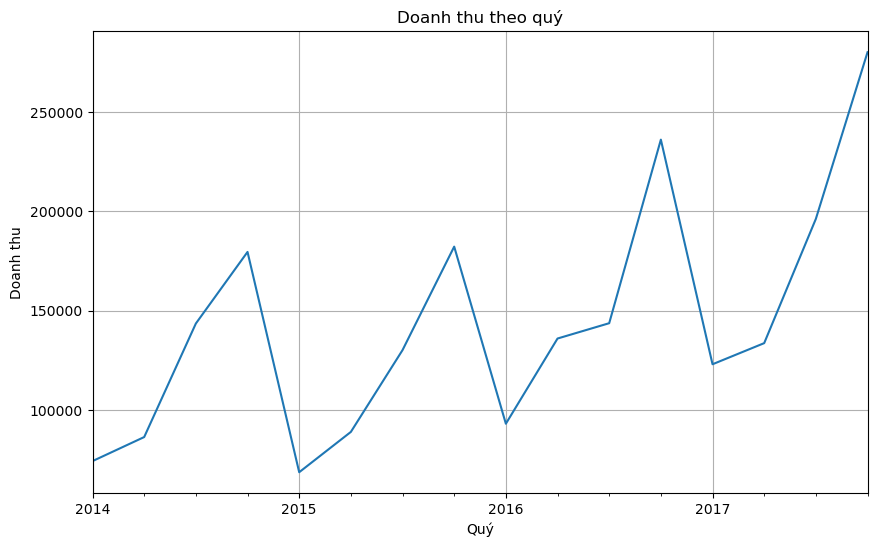

In [40]:
# Biểu đồ doanh thu theo quý
plt.figure(figsize=(10, 6))
quarterly_sales.plot()
plt.title('Doanh thu theo quý')
plt.xlabel('Quý')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

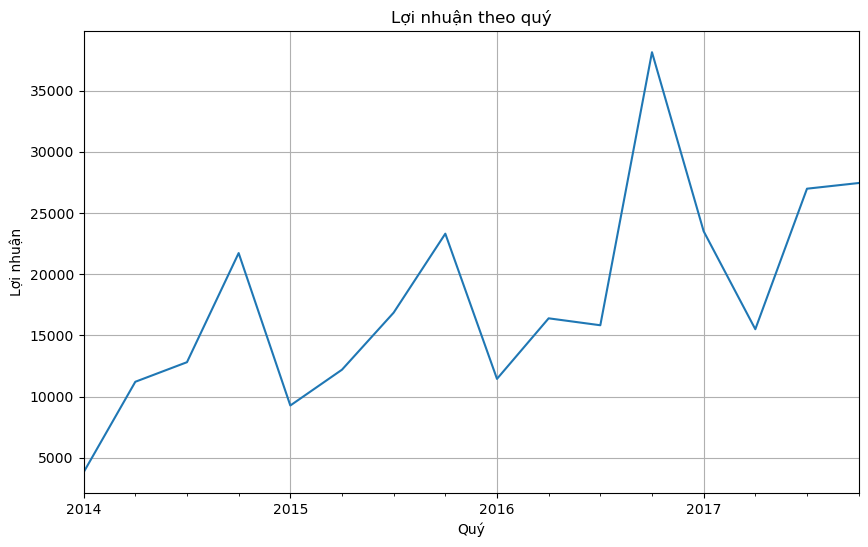

In [41]:
# Biểu đồ lợi nhuận theo quý
plt.figure(figsize=(10, 6))
quarterly_profit.plot()
plt.title('Lợi nhuận theo quý')
plt.xlabel('Quý')
plt.ylabel('Lợi nhuận')
plt.grid(True)
plt.show()

In [42]:
# Doanh thu và lợi nhuận theo khu vực
region_sales = df.groupby('Region')['Sales'].sum()
region_profit = df.groupby('Region')['Profit'].sum()

print("Doanh thu theo khu vực:")
print(region_sales)
print("Lợi nhuận theo khu vực:")
print(region_profit)

Doanh thu theo khu vực:
Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64
Lợi nhuận theo khu vực:
Region
Central     39706.3625
East        91522.7800
South       46749.4303
West       108418.4489
Name: Profit, dtype: float64


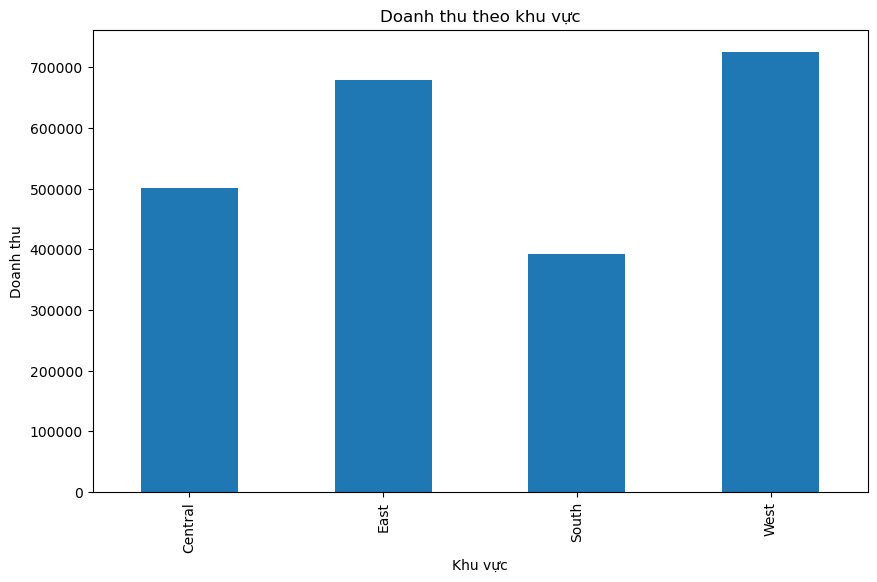

In [43]:
# Biểu đồ doanh thu theo khu vực
plt.figure(figsize=(10,6))
region_sales.plot(kind='bar')
plt.title('Doanh thu theo khu vực')
plt.xlabel('Khu vực') 
plt.ylabel('Doanh thu')
plt.show()

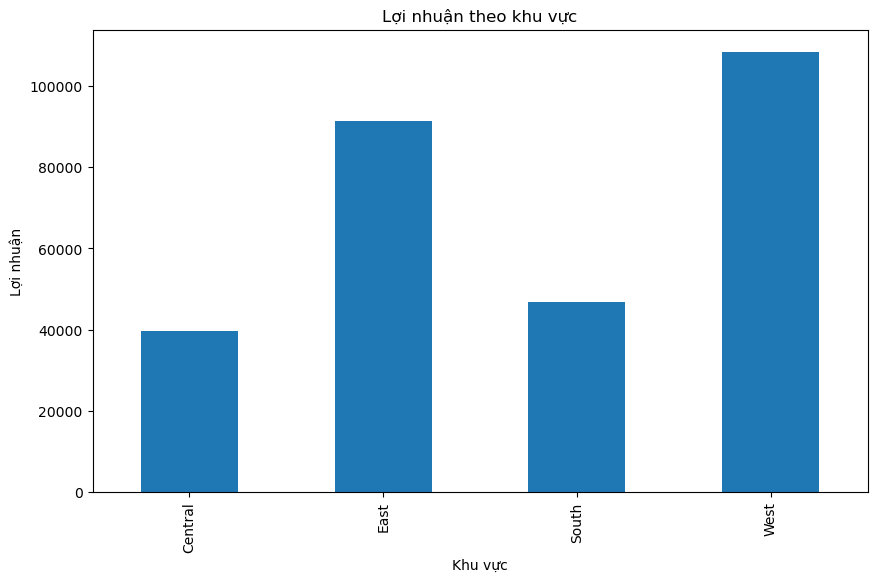

In [44]:
# Biểu đồ lợi nhuận theo khu vực
plt.figure(figsize=(10,6))
region_profit.plot(kind='bar')
plt.title('Lợi nhuận theo khu vực')
plt.xlabel('Khu vực')
plt.ylabel('Lợi nhuận')
plt.show()

In [45]:
# Thời gian giao hàng trung bình
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
average_delivery_time = df['Delivery Time'].mean()

print(f"Thời gian giao hàng trung bình: {average_delivery_time} ngày")

Thời gian giao hàng trung bình: 3.958174904942966 ngày


In [46]:
# Phân tích doanh thu và lợi nhuận theo các chế độ giao hàng khác nhau
ship_mode_analysis = df.groupby('Ship Mode').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Delivery Time': 'mean'
}).reset_index()

print(ship_mode_analysis)

        Ship Mode         Sales       Profit  Delivery Time
0     First Class  3.514284e+05   48969.8399       2.182705
1        Same Day  1.283631e+05   15891.7589       0.044199
2    Second Class  4.591936e+05   57446.6354       3.238046
3  Standard Class  1.358216e+06  164088.7875       5.006535


In [47]:
#Doanh thu theo sản phẩm
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

print("Doanh thu theo sản phẩm")
print(product_sales.head())

Doanh thu theo sản phẩm
Product Name
Canon imageCLASS 2200 Advanced Copier                                          61599.824
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
HON 5400 Series Task Chairs for Big and Tall                                   21870.576
GBC DocuBind TL300 Electric Binding System                                     19823.479
Name: Sales, dtype: float64


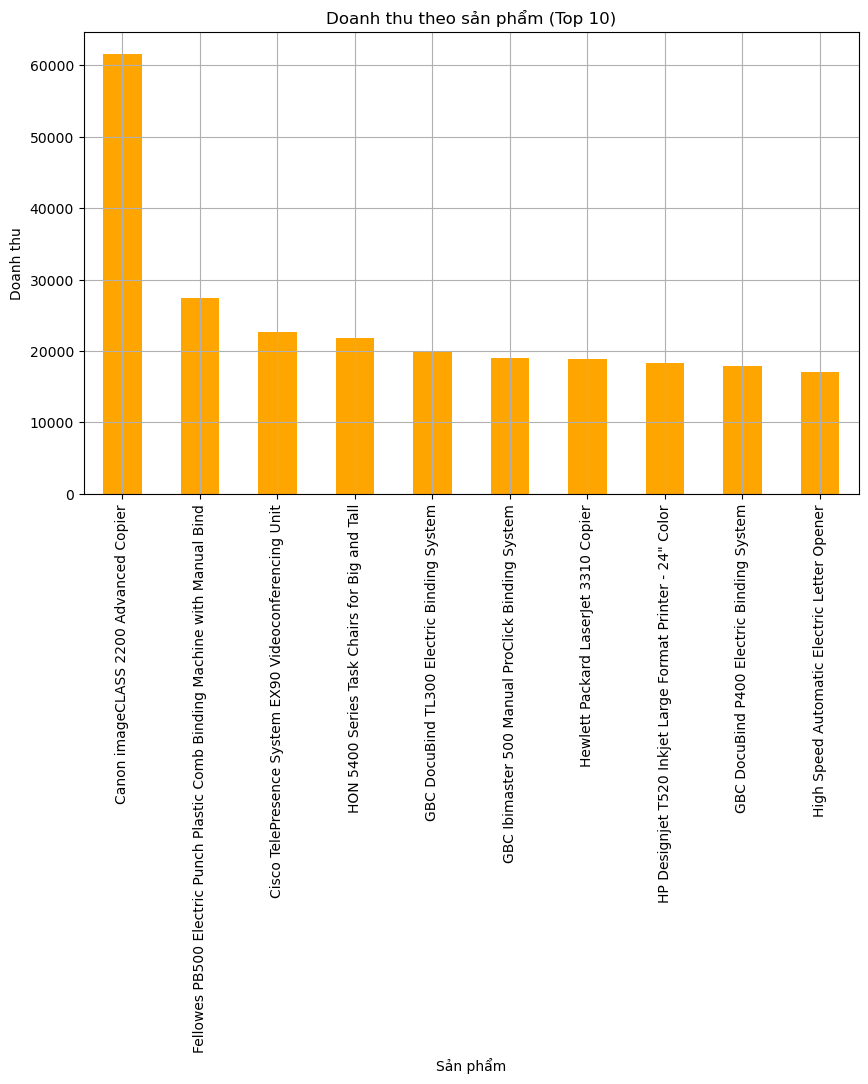

In [48]:

# Biểu đồ doanh thu theo sản phẩm
plt.figure(figsize=(10, 6))
product_sales.head(10).plot(kind='bar', color='orange')
plt.title('Doanh thu theo sản phẩm (Top 10)')
plt.xlabel('Sản phẩm')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [49]:
# Lợi nhuận theo sản phẩm
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)

print("Lợi nhuận theo sản phẩm:")
print(product_profit.head())

Lợi nhuận theo sản phẩm:
Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64


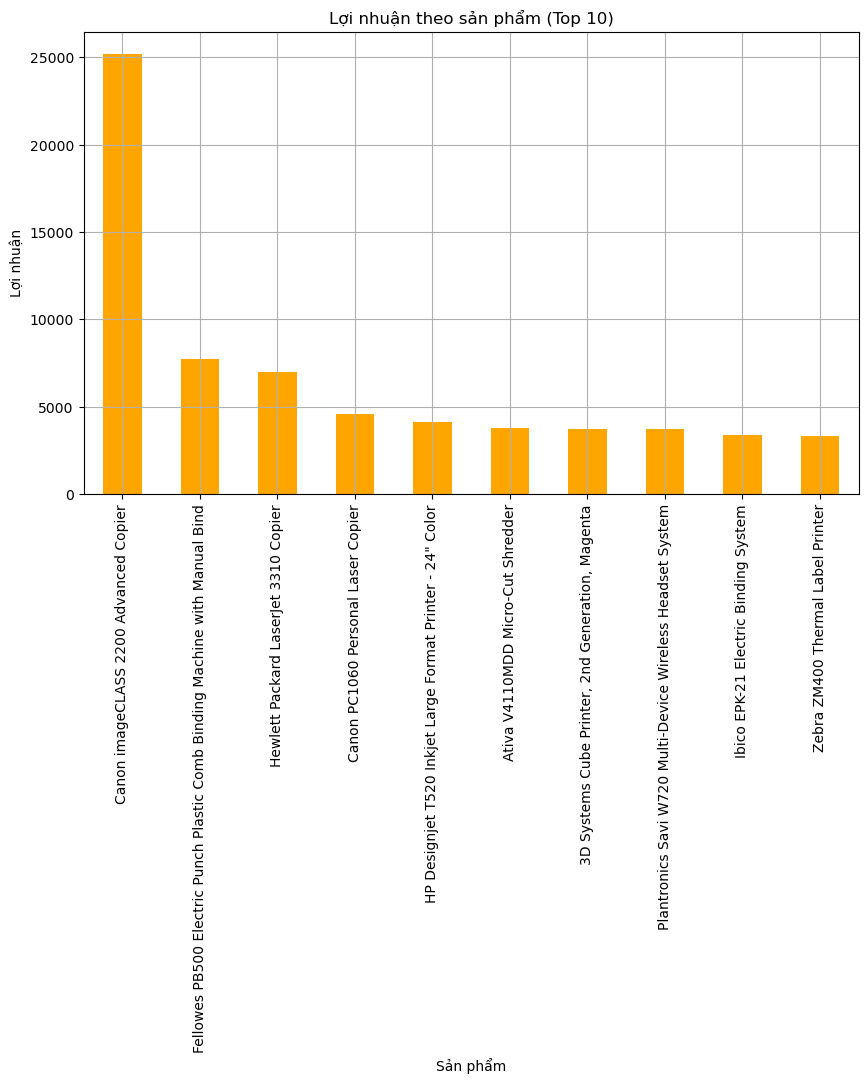

In [50]:

# Biểu đồ lợi nhuận theo sản phẩm
plt.figure(figsize=(10, 6))
product_profit.head(10).plot(kind='bar', color='orange')
plt.title('Lợi nhuận theo sản phẩm (Top 10)')
plt.xlabel('Sản phẩm')
plt.ylabel('Lợi nhuận')
plt.grid(True)
plt.show()

In [51]:
# Lợi nhuận theo khách hàng
customer_sales = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False)

print("Doanh thu theo khách hàng:")
print(customer_sales.head())

Doanh thu theo khách hàng:
Customer Name
Sean Miller      25043.050
Tamara Chand     19052.218
Raymond Buch     15117.339
Tom Ashbrook     14595.620
Adrian Barton    14473.571
Name: Sales, dtype: float64


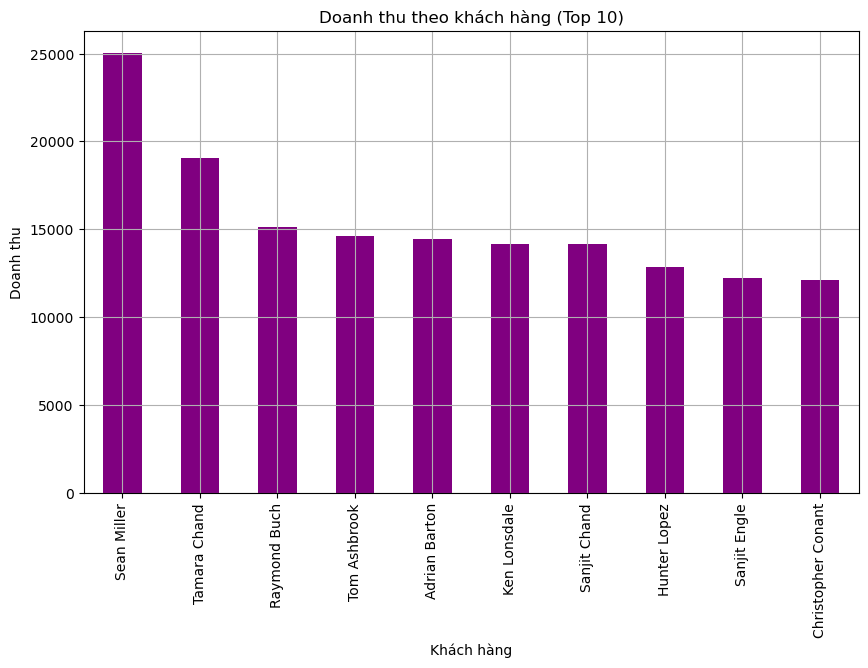

In [52]:
# Biểu đồ doanh thu theo khách hàng
plt.figure(figsize=(10, 6))
customer_sales.head(10).plot(kind='bar', color='purple')
plt.title('Doanh thu theo khách hàng (Top 10)')
plt.xlabel('Khách hàng')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

In [53]:
# Lợi nhuận theo khách hàng
customer_profit = df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False)

print("Lợi nhuận theo khách hàng:")
print(customer_profit.head())

Lợi nhuận theo khách hàng:
Customer Name
Tamara Chand     8981.3239
Raymond Buch     6976.0959
Sanjit Chand     5757.4119
Hunter Lopez     5622.4292
Adrian Barton    5444.8055
Name: Profit, dtype: float64


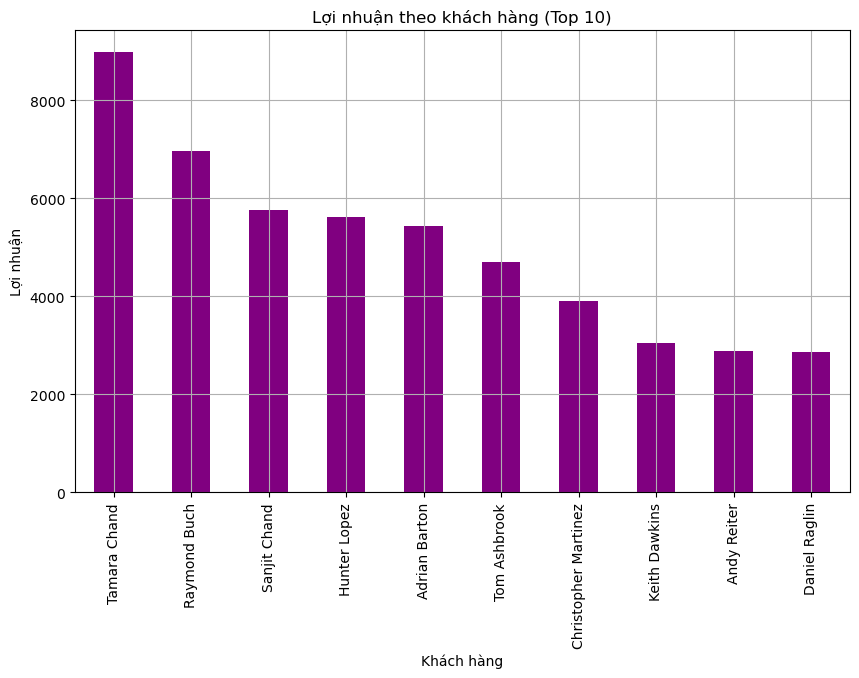

In [54]:
# Biểu đồ lợi nhuận theo khách hàng
plt.figure(figsize=(10, 6))
customer_profit.head(10).plot(kind='bar', color='purple')
plt.title('Lợi nhuận theo khách hàng (Top 10)')
plt.xlabel('Khách hàng')
plt.ylabel('Lợi nhuận')
plt.grid(True)
plt.show()

In [55]:
# Xu hướng doanh thu theo năm
yearly_sales = df.resample('Y', on='Order Date')['Sales'].sum()
yearly_profit = df.resample('Y', on='Order Date')['Profit'].sum()

print("Doanh thu theo năm:")
print(yearly_sales)
print("Lợi nhuận theo năm:")
print(yearly_profit)

Doanh thu theo năm:
Order Date
2014-12-31    484247.4981
2015-12-31    470532.5090
2016-12-31    609205.5980
2017-12-31    733215.2552
Freq: A-DEC, Name: Sales, dtype: float64
Lợi nhuận theo năm:
Order Date
2014-12-31    49543.9741
2015-12-31    61618.6037
2016-12-31    81795.1743
2017-12-31    93439.2696
Freq: A-DEC, Name: Profit, dtype: float64


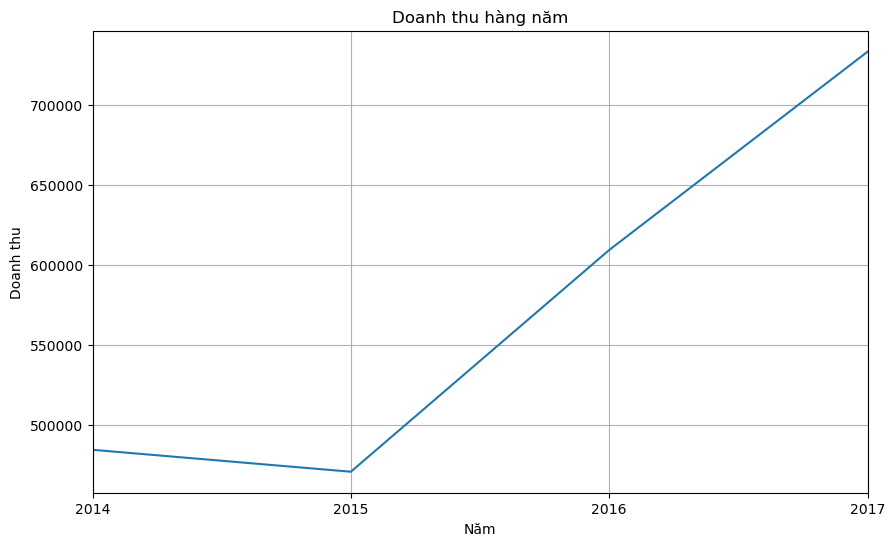

In [56]:
# Biểu đồ doanh thu theo năm 
plt.figure(figsize = (10,6))
yearly_sales.plot()
plt.title('Doanh thu hàng năm')
plt.xlabel('Năm')
plt.ylabel('Doanh thu')
plt.grid(True)
plt.show()

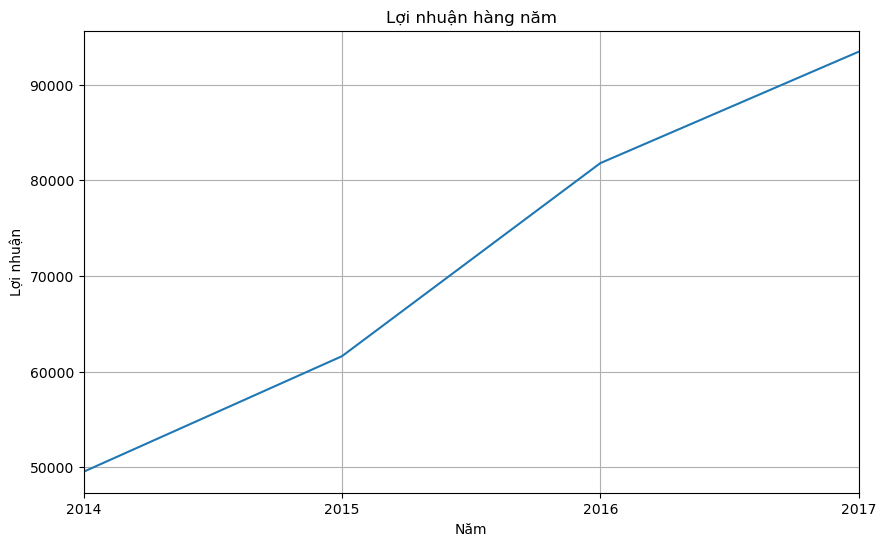

In [57]:
# Biểu đồ lợi nhuận theo năm 
plt.figure(figsize = (10,6))
yearly_profit.plot()
plt.title('Lợi nhuận hàng năm')
plt.xlabel('Năm')
plt.ylabel('Lợi nhuận')
plt.grid(True)
plt.show()

In [58]:
# Ảnh hưởng của chiết khấu
discount_sales_profit = df.groupby('Discount')[['Sales', 'Profit']].sum()

print("Ảnh hưởng của chiết khấu:")
print(discount_sales_profit)

Ảnh hưởng của chiết khấu:
                 Sales       Profit
Discount                           
0.00      1.087908e+06  320987.6032
0.10      5.436935e+04    9029.1770
0.15      2.755852e+04    1418.9915
0.20      7.645944e+05   90337.3060
0.30      1.032267e+05  -10369.2774
0.32      1.449346e+04   -2391.1377
0.40      1.164178e+05  -23057.0504
0.45      5.484974e+03   -2493.1111
0.50      5.891854e+04  -20506.4281
0.60      6.644700e+03   -5944.6552
0.70      4.062028e+04  -40075.3569
0.80      1.696376e+04  -30539.0392


<Figure size 1000x600 with 0 Axes>

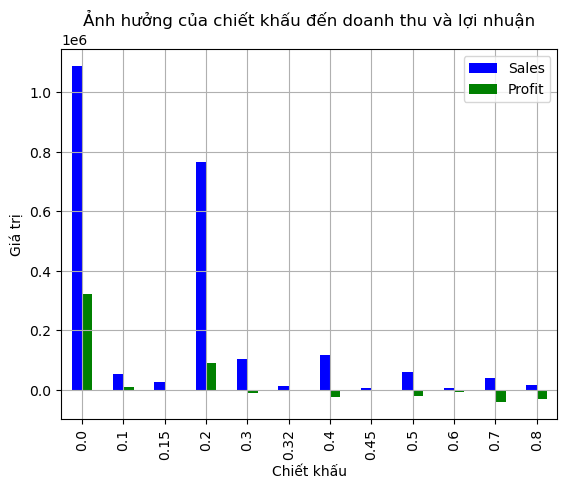

In [59]:
# Biểu đồ ảnh hưởng của chiết khấu
plt.figure(figsize=(10, 6))
discount_sales_profit.plot(kind='bar', color=['blue', 'green'])
plt.title('Ảnh hưởng của chiết khấu đến doanh thu và lợi nhuận')
plt.xlabel('Chiết khấu')
plt.ylabel('Giá trị')
plt.grid(True)
plt.show()

In [61]:
#Phân khúc khách hàng theo mô hình RFM
snapshot_date = df['Order Date'].max() + dt.timedelta(days=1)
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (snapshot_date - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# Phân loại khách hàng dựa trên RFM
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [62]:
rfm.head(10)

,Customer ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,AA-10315,185,11,5563.560,2,3,5,235
1,AA-10375,20,15,1056.390,5,4,2,542
2,AA-10480,260,12,1790.512,1,3,3,133
3,AA-10645,56,18,5086.935,3,4,5,345
4,AB-10015,416,6,886.156,1,1,1,111
5,AB-10060,55,18,7755.620,3,5,5,355
6,AB-10105,42,20,14473.571,4,5,5,455
7,AB-10150,42,12,966.710,4,3,2,432
8,AB-10165,26,14,1113.838,5,4,2,542
9,AB-10255,167,14,914.532,2,4,1,241


C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

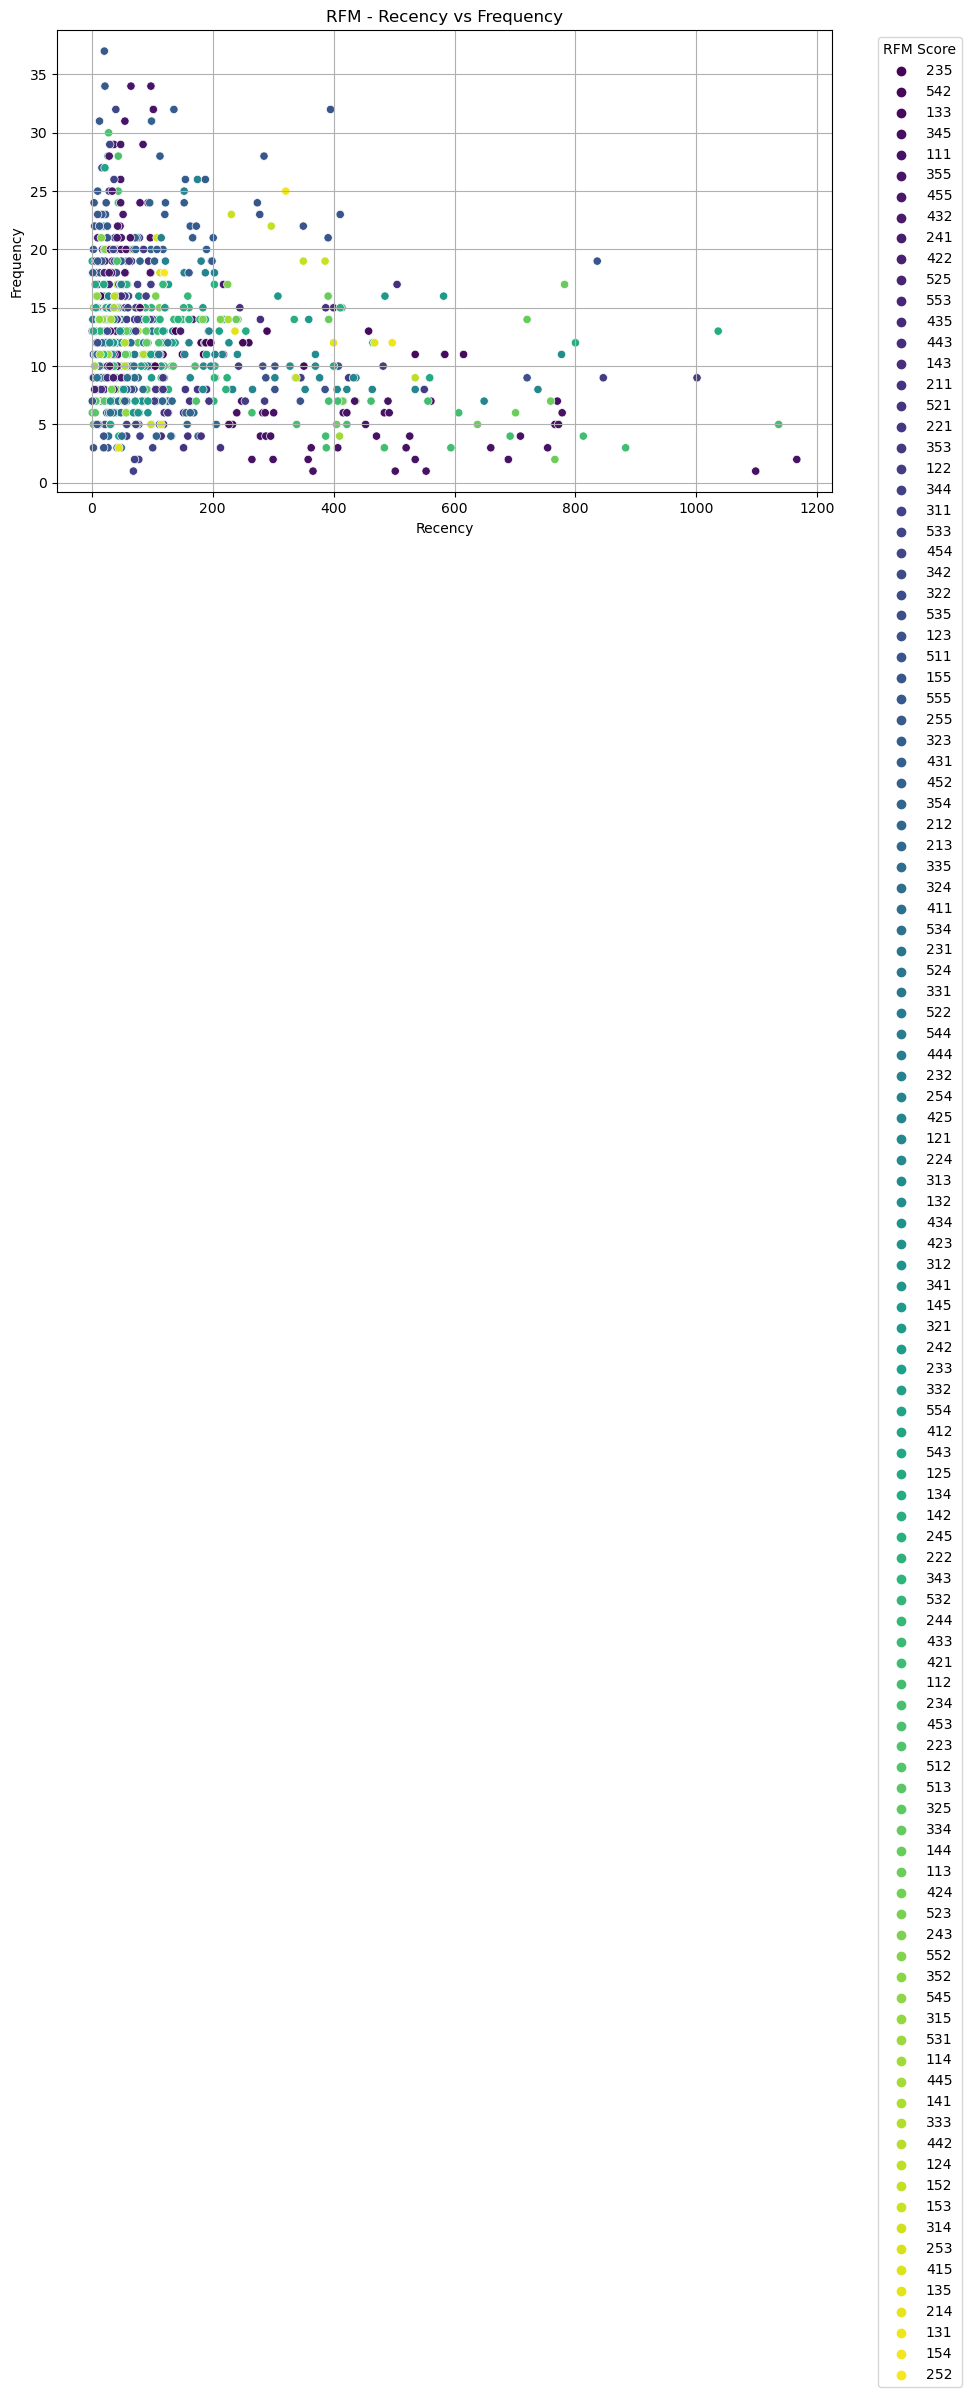

In [63]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Frequency', hue='RFM_Score', data=rfm, palette='viridis')
plt.title('RFM - Recency vs Frequency')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\84388\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

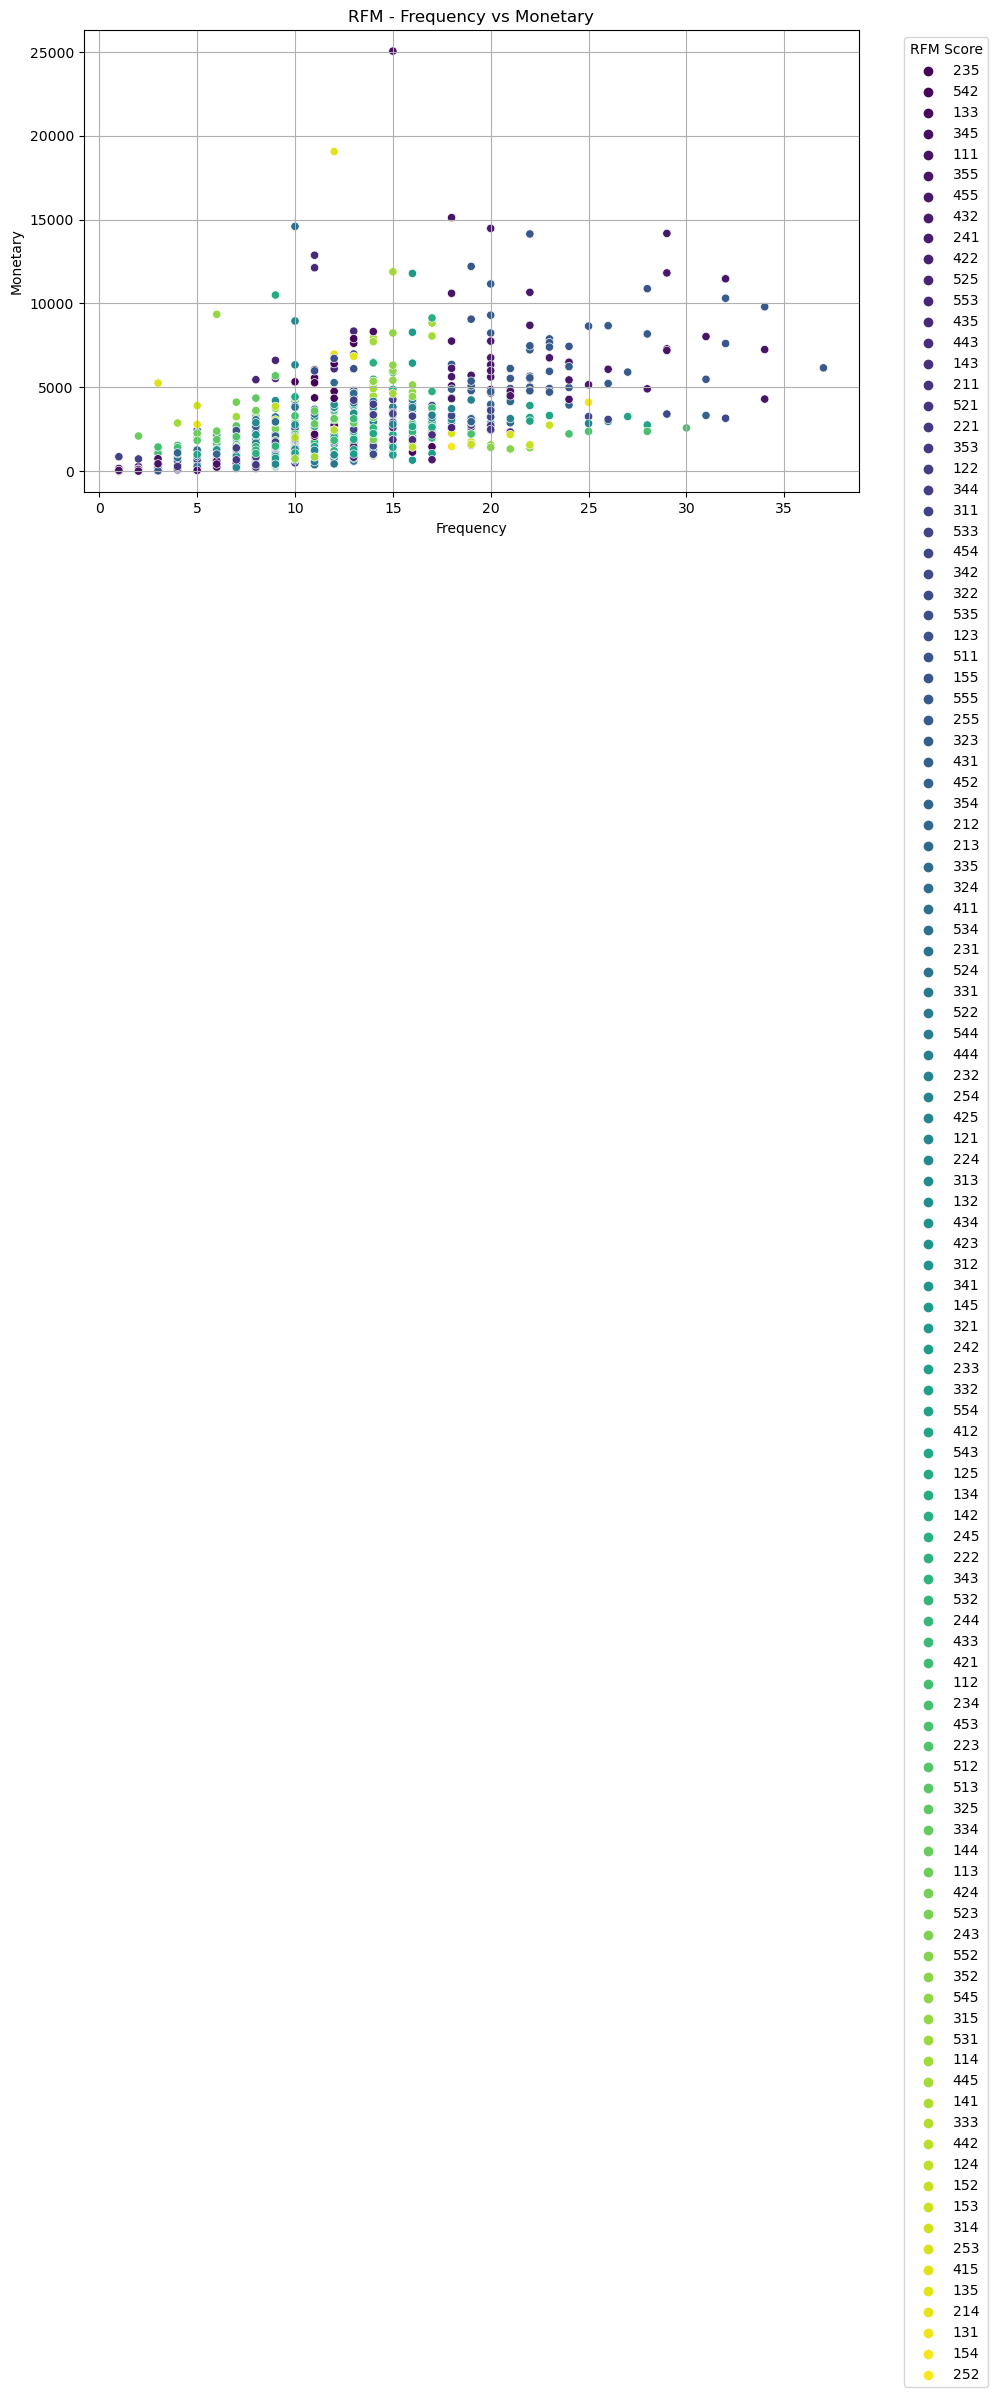

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Frequency', y='Monetary', hue='RFM_Score', data=rfm, palette='viridis')
plt.title('RFM - Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.legend(title='RFM Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

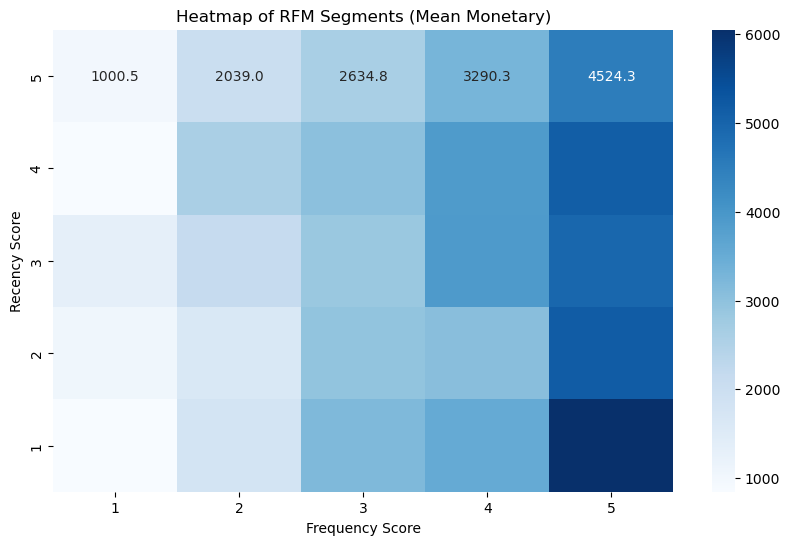

In [65]:
rfm_heatmap = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean').fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(rfm_heatmap, annot=True, fmt=".1f", cmap='Blues')
plt.title('Heatmap of RFM Segments (Mean Monetary)')
plt.xlabel('Frequency Score')
plt.ylabel('Recency Score')
plt.show()

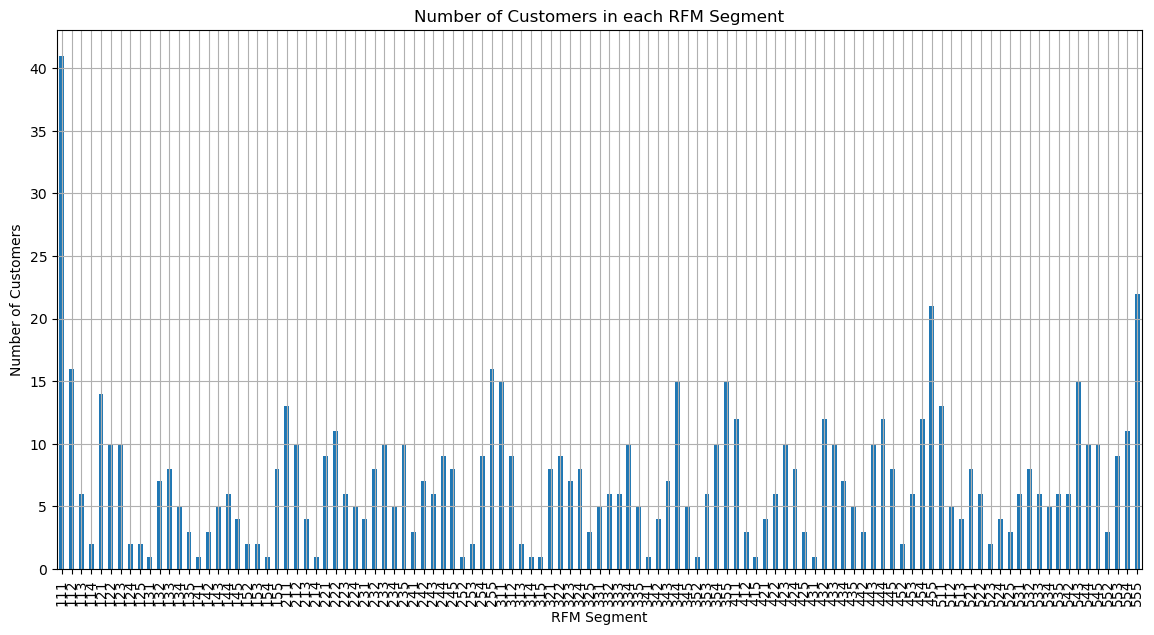

In [66]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm_counts = rfm['RFM_Score'].value_counts().sort_index()

plt.figure(figsize=(14, 7))
rfm_counts.plot(kind='bar')
plt.title('Number of Customers in each RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

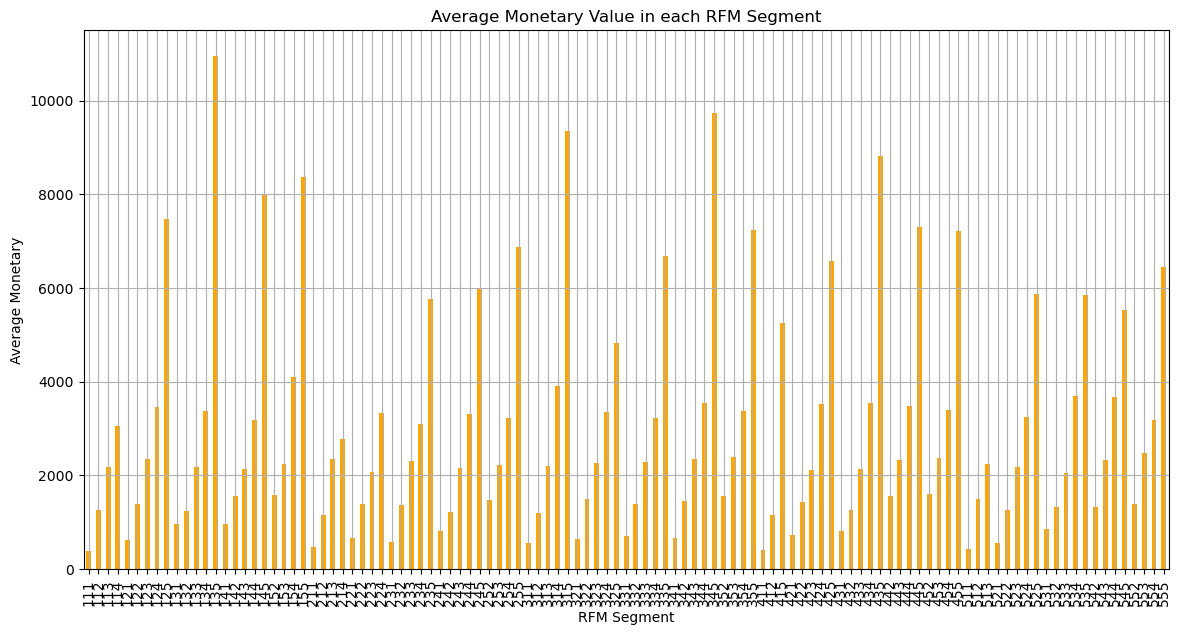

In [67]:
rfm_avg_monetary = rfm.groupby('RFM_Score')['Monetary'].mean().sort_index()

plt.figure(figsize=(14, 7))
rfm_avg_monetary.plot(kind='bar', color='orange')
plt.title('Average Monetary Value in each RFM Segment')
plt.xlabel('RFM Segment')
plt.ylabel('Average Monetary')
plt.grid(True)
plt.show()

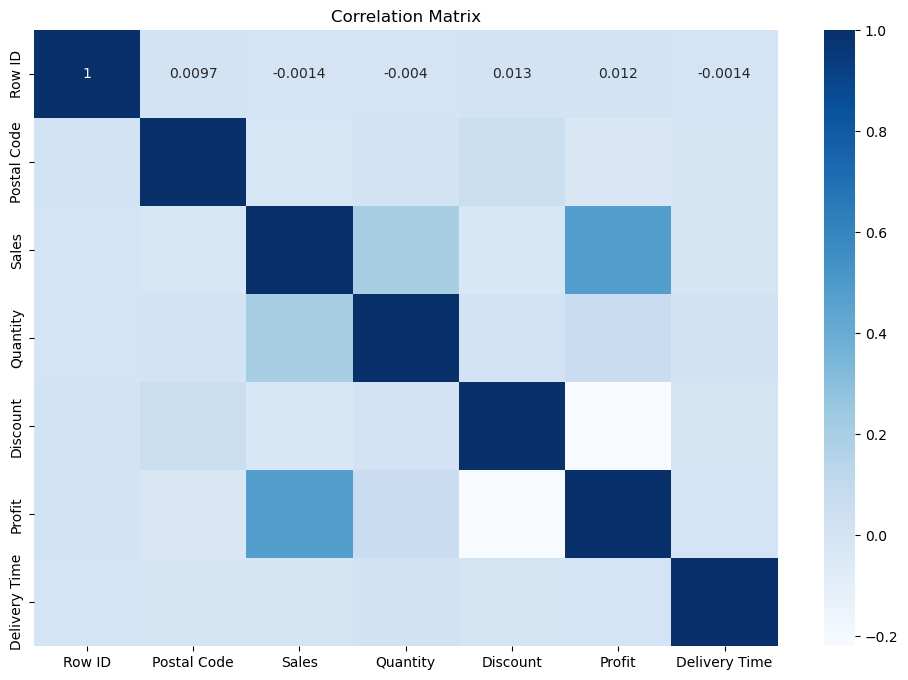

In [68]:
# Ma trận độ tương quan giữa các số liệu
# Lọc các cột số
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Tính toán ma trận tương quan
corr_matrix = numeric_df.corr()

# Vẽ biểu đồ nhiệt của ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [71]:
# Hồi quy tuyến tính để phân tích các yếu tố ảnh hưởng đến lợi nhuận: linear_model
# Chuẩn bị dữ liệu
X = df[['Discount', 'Quantity', 'Delivery Time']]
y = df['Profit']

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Hệ số hồi quy
coef_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("Hệ số hồi quy:")
print(coef_df)

Hệ số hồi quy:
               Coefficient
Discount       -249.716583
Quantity          7.186131
Delivery Time    -0.778619


C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     185.8
Date:                Wed, 10 Jul 2024   Prob (F-statistic):          2.95e-117
Time:                        15:39:16   Log-Likelihood:                -68441.
No. Observations:                9994   AIC:                         1.369e+05
Df Residuals:                    9990   BIC:                         1.369e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            43.5128      7.009      6.208

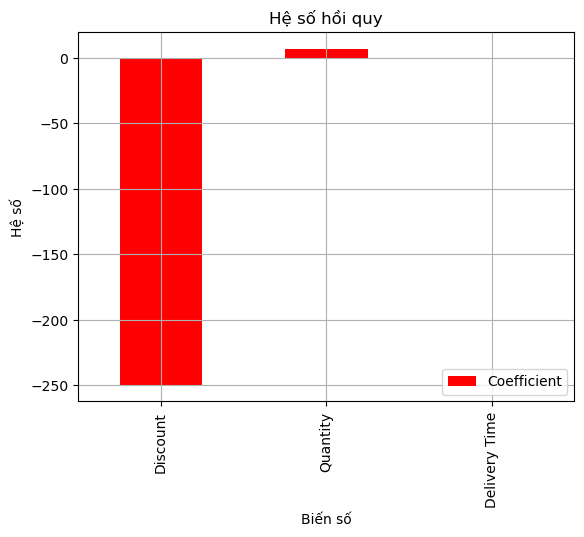

In [72]:
# Biểu đồ hồi quy tuyến tính: Trực quan hóa kết quả hồi quy : statsmodel.api 
# Thêm cột hằng số cho mô hình hồi quy
X = sm.add_constant(X)

# Huấn luyện mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In ra tóm tắt kết quả hồi quy
print(model.summary())

# Trực quan hóa hệ số hồi quy
coef_df.plot(kind='bar', color='red')
plt.title('Hệ số hồi quy')
plt.xlabel('Biến số')
plt.ylabel('Hệ số')
plt.grid(True)
plt.show()

In [73]:
#Dự đoạn doanh thu tương lai 
from fbprophet import Prophet

# Chuẩn bị dữ liệu cho Prophet
df_prophet = df[['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Tạo mô hình Prophet
model = Prophet()
model.fit(df_prophet)

# Tạo dataframe chứa các ngày cần dự đoán
future = model.make_future_dataframe(periods=365)

# Dự đoán doanh thu
forecast = model.predict(future)

# Trực quan hóa kết quả dự đoán
model.plot(forecast)
plt.title('Dự đoán doanh thu trong tương lai')
plt.xlabel('Ngày')
plt.ylabel('Doanh thu')
plt.show()

# Trực quan hóa các thành phần của dự đoán
model.plot_components(forecast)
plt.show()

ModuleNotFoundError: No module named 'fbprophet'

C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

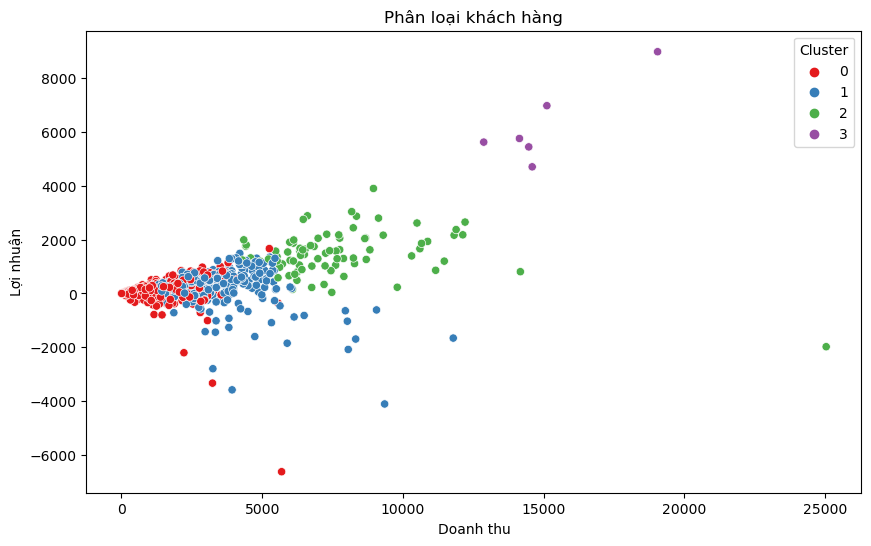

In [74]:
#Phân loại khách hàng: 
# Chuẩn bị dữ liệu
customer_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
}).reset_index()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Sales', 'Quantity', 'Profit']])

# Áp dụng K-means
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Trực quan hóa kết quả phân cụm
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Profit', hue='Cluster', palette='Set1')
plt.title('Phân loại khách hàng')
plt.xlabel('Doanh thu')
plt.ylabel('Lợi nhuận')
plt.legend(title='Cluster')
plt.show()

In [75]:
# Dự đoán khách hàng có khả năng không quay lại : model_selection, ensemble,metrics
# Chuẩn bị dữ liệu
df['Churn'] = df['Order Date'].diff().dt.days > 30  # Giả sử khách hàng rời bỏ nếu không mua hàng trong vòng 30 ngày
customer_churn_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Profit': 'sum',
    'Churn': 'max'
}).reset_index()

# Phân chia dữ liệu
X = customer_churn_data[['Sales', 'Quantity', 'Profit']]
y = customer_churn_data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình RandomForest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

[[  1  12]
 [  3 222]]
              precision    recall  f1-score   support

       False       0.25      0.08      0.12        13
        True       0.95      0.99      0.97       225

    accuracy                           0.94       238
   macro avg       0.60      0.53      0.54       238
weighted avg       0.91      0.94      0.92       238



C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

In [76]:
# Dự đoán lợi nhuận theo sản phẩm : model_selection,liner_model, metrics
# Chuẩn bị dữ liệu
product_data = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum'
}).reset_index()

# Xây dựng mô hình hồi quy
X = product_data[['Sales', 'Quantity', 'Discount']]
y = product_data['Profit']

# Phân chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 238.05475026428928


C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtyp

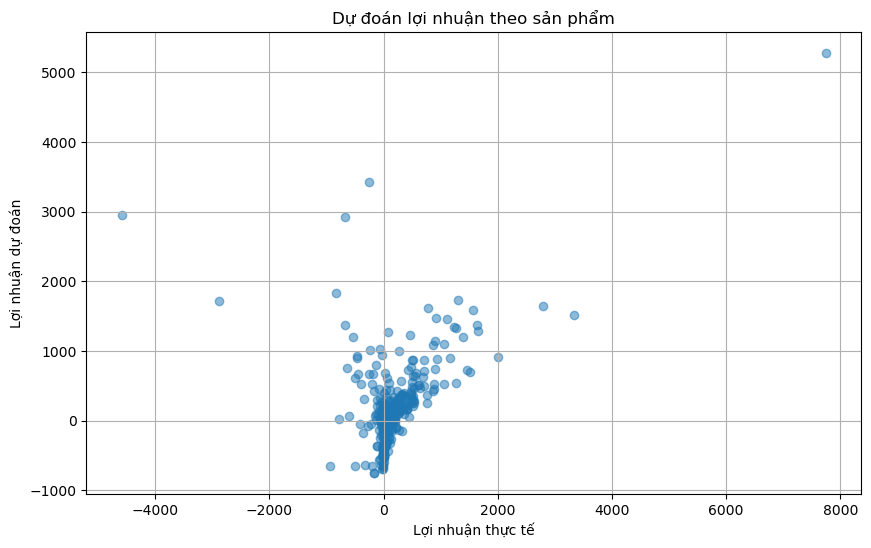

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Dự đoán lợi nhuận theo sản phẩm')
plt.xlabel('Lợi nhuận thực tế')
plt.ylabel('Lợi nhuận dự đoán')
plt.grid(True)
plt.show()

In [78]:
# Dự đoán khả năng mua lại : GradientBoostingClassifier
# Chuẩn bị dữ liệu
df['Repeat Purchase'] = df['Order Date'].diff().dt.days < 30  # Giả sử khách hàng mua lại nếu mua hàng trong vòng 30 ngày

customer_repeat_data = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit': 'sum',
    'Repeat Purchase': 'max'
}).reset_index()

# Phân chia dữ liệu
X = customer_repeat_data[['Sales', 'Quantity', 'Discount', 'Profit']]
y = customer_repeat_data['Repeat Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện mô hình GradientBoosting
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   2]
 [  0 236]]
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.99      1.00      1.00       236

    accuracy                           0.99       238
   macro avg       0.50      0.50      0.50       238
weighted avg       0.98      0.99      0.99       238



C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
C:\Users\84388\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1814: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

In [79]:
# Gợi ý sản phẩm cho khách hàng :cosine_similarity, csr_matrix
# Tổng hợp giá trị Sales cho các cặp Customer ID và Product Name trùng lặp
df = df.groupby(['Customer ID', 'Product Name']).agg({'Sales': 'sum'}).reset_index()

# Chuẩn bị ma trận người dùng - sản phẩm
user_product_matrix = df.pivot(index='Customer ID', columns='Product Name', values='Sales').fillna(0)

# Tính toán độ tương đồng cosine
cosine_sim = cosine_similarity(user_product_matrix)

# Tạo DataFrame chứa độ tương đồng
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_product_matrix.index, columns=user_product_matrix.index)

# Hàm gợi ý sản phẩm cho người dùng
def recommend_products(customer_id, num_recommendations=5):
    # Lấy độ tương đồng của khách hàng với các khách hàng khác
    similar_customers = cosine_sim_df.loc[customer_id].sort_values(ascending=False)

    # Lấy các sản phẩm mà khách hàng đã mua
    purchased_products = user_product_matrix.loc[customer_id]
    purchased_products = purchased_products[purchased_products > 0].index.tolist()

    # Tạo một DataFrame chứa điểm gợi ý cho các sản phẩm
    recommendations = pd.Series(dtype=float)

    # Tính điểm gợi ý cho các sản phẩm
    for similar_customer in similar_customers.index:
        if similar_customer == customer_id:
            continue
        similar_customer_products = user_product_matrix.loc[similar_customer]
        for product, score in similar_customer_products.items():
            if product not in purchased_products:
                if product in recommendations:
                    recommendations[product] += score * similar_customers[similar_customer]
                else:
                    recommendations[product] = score * similar_customers[similar_customer]

    # Sắp xếp và lấy ra các sản phẩm được gợi ý nhiều nhất
    recommendations = recommendations.sort_values(ascending=False)
    return recommendations.head(num_recommendations)

# Ví dụ gợi ý sản phẩm cho một khách hàng cụ thể
customer_id = user_product_matrix.index[0]
print(f"Gợi ý sản phẩm cho khách hàng {customer_id}:")
print(recommend_products(customer_id))

Gợi ý sản phẩm cho khách hàng AA-10315:
Mitel MiVoice 5330e IP Phone                                                1859.346866
Tennsco Snap-Together Open Shelving Units, Starter Sets and Add-On Units    1027.556409
GBC DocuBind TL200 Manual Binding Machine                                    823.460320
ClearOne Communications CHAT 70 OC Speaker Phone                             597.460664
Hon Olson Stacker Stools                                                     517.686614
dtype: float64


In [67]:
from mlxtend.frequent_patterns import apriori, association_rules
#Phân tích giỏ hàng và đưa ra các mặt hàng thường được mua chung với nhau để tạo ra gợi ý cho khách hàng
# Chuẩn bị dữ liệu
basket = df.groupby(['Order ID', 'Product Name'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID')
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Kiểm tra dữ liệu đã chuẩn bị
print(basket.head())

# Áp dụng thuật toán Apriori
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Kiểm tra đầu ra của apriori
print(frequent_itemsets.head())

# Nếu không có tập hợp mục thường xuyên nào được tìm thấy, thử giảm ngưỡng min_support
if frequent_itemsets.empty:
    print("No frequent itemsets found, trying with lower min_support.")
    frequent_itemsets = apriori(basket, min_support=0.005, use_colnames=True)
    print(frequent_itemsets.head())

# Tìm luật kết hợp
if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
    print(rules.head())
else:
    print("No frequent itemsets found even with lower min_support.")

C:\Users\84388\AppData\Local\Temp\ipykernel_26176\105117236.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Product Name    "While you Were Out" Message Book, One Form per Page  \
Order ID                                                               
CA-2014-100006                                                  0      
CA-2014-100090                                                  0      
CA-2014-100293                                                  0      
CA-2014-100328                                                  0      
CA-2014-100363                                                  0      

Product Name    #10 Gummed Flap White Envelopes, 100/Box  \
Order ID                                                   
CA-2014-100006                                         0   
CA-2014-100090                                         0   
CA-2014-100293                                         0   
CA-2014-100328                                         0   
CA-2014-100363                                         0   

Product Name    #10 Self-Seal White Envelopes  \
Order ID                 

C:\Users\84388\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\84388\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support             itemsets
0  0.009183  (Easy-staple paper)
1  0.009583    (Staple envelope)
2  0.009183            (Staples)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [ ]:
# Giả sử có dữ liệu về khách hàng tiềm năng và khách hàng thực sự
leads = pd.read_csv('leads_data.csv')
leads['Converted'] = leads['Status'].apply(lambda x: 1 if x == 'Converted' else 0)

# Tỷ lệ chuyển đổi theo nguồn
conversion_rate_by_source = leads.groupby('Lead Source')['Converted'].mean()

plt.figure(figsize=(10, 6))
conversion_rate_by_source.plot(kind='bar', color='skyblue')
plt.title('Tỷ lệ chuyển đổi theo nguồn')
plt.xlabel('Nguồn')
plt.ylabel('Tỷ lệ chuyển đổi')
plt.grid(True)
plt.show()

In [ ]:
#Giả sử có dữ liệu về hàng tồn kho
inventory_data = pd.read_csv('inventory_data.csv')

# Phân tích hàng tồn kho theo sản phẩm
inventory_by_product = inventory_data.groupby('Product Name').agg({
    'Stock Level': 'sum',
    'Reorder Level': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=inventory_by_product, x='Product Name', y='Stock Level', color='blue')
plt.xticks(rotation=45)
plt.title('Mức tồn kho theo sản phẩm')
plt.xlabel('Sản phẩm')
plt.ylabel('Mức tồn kho')
plt.grid(True)
plt.show()

In [ ]:
# Giả sử có dữ liệu A/B testing
ab_test_data = pd.read_csv('ab_test_data.csv')

# Tính toán tỷ lệ chuyển đổi cho mỗi nhóm
conversion_rate = ab_test_data.groupby('Group')['Converted'].mean()

plt.figure(figsize=(10, 6))
conversion_rate.plot(kind='bar', color=['blue', 'orange'])
plt.title('T